In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\rakap\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
data = web.DataReader('^NSEI', data_source='yahoo', start='2011-01-01', end='2020-04-17')

In [4]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,6178.549805,6147.200195,6177.450195,6157.600098,0.0,6157.600098
2011-01-04,6181.049805,6124.399902,6172.750000,6146.350098,0.0,6146.350098
2011-01-05,6141.350098,6062.350098,6141.350098,6079.799805,0.0,6079.799805
2011-01-06,6116.149902,6022.299805,6107.000000,6048.250000,0.0,6048.250000
2011-01-07,6051.200195,5883.600098,6030.899902,5904.600098,0.0,5904.600098
...,...,...,...,...,...,...
2020-04-09,9128.349609,8904.549805,8973.049805,9111.900391,742100.0,9111.900391
2020-04-13,9112.049805,8912.400391,9103.950195,8993.849609,644000.0,8993.849609
2020-04-15,9261.200195,8874.099609,9196.400391,8925.299805,879100.0,8925.299805


In [5]:
data.shape

(2267, 6)

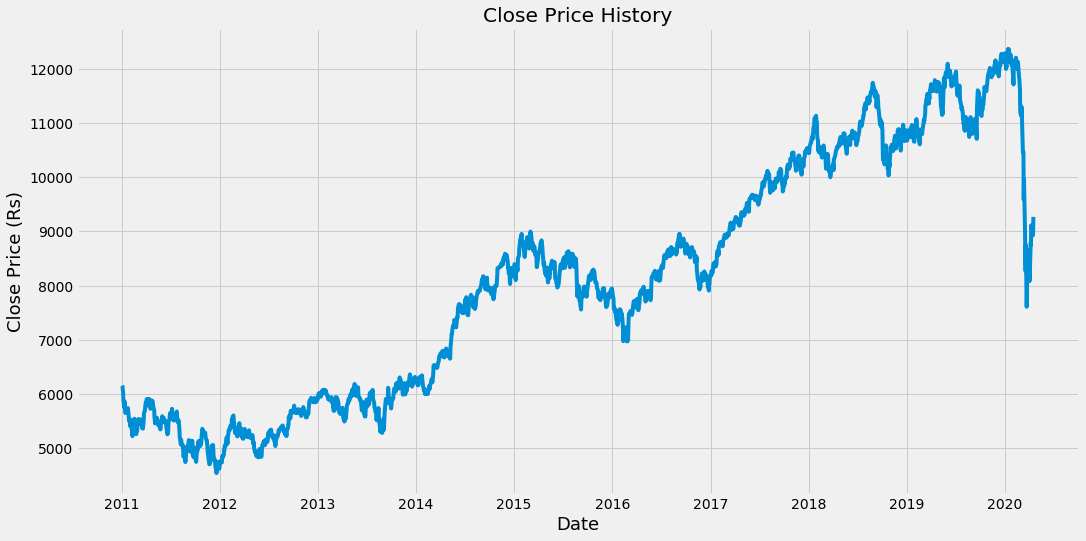

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rs)', fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the 'Close column
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1814

In [8]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.20636727],
       [0.20492831],
       [0.19641597],
       ...,
       [0.5603791 ],
       [0.56901291],
       [0.60405342]])

In [9]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.20636727, 0.20492831, 0.19641597, 0.19238049, 0.17400647,
       0.15587546, 0.15475627, 0.16871745, 0.15447484, 0.14202296,
       0.14204856, 0.15091258, 0.14669161, 0.14932016, 0.14738873,
       0.15336845, 0.14622476, 0.13559556, 0.12380882, 0.1230094 ,
       0.11166396, 0.11355698, 0.1256763 , 0.10892031, 0.10895228,
       0.09827831, 0.09073172, 0.08718226, 0.09795217, 0.11662678,
       0.11982449, 0.11991405, 0.12819612, 0.11700414, 0.12463386,
       0.1183152 , 0.11424131, 0.09190213, 0.09712713, 0.10092604,
       0.12510708, 0.12688506, 0.1272112 , 0.11754131, 0.12491522,
       0.12621991, 0.12153845, 0.11527737, 0.12628386, 0.11581455,
       0.12368091, 0.11543083, 0.10609995, 0.10495515, 0.11123546,
       0.11972856, 0.12511988, 0.14198461, 0.14620558, 0.15248589])]
[0.15904756515767315]

[array([0.20636727, 0.20492831, 0.19641597, 0.19238049, 0.17400647,
       0.15587546, 0.15475627, 0.16871745, 0.15447484, 0.14202296,
       0.14204856, 0.15091258, 0.14

In [10]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1754, 60, 1)

In [12]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences= False))
model.add(Dense(10))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')